In this notebook, the effects of a basic sampling are explored.

In [22]:
import pandas as pd
from sktime.classification.hybrid import HIVECOTEV2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
import time

In [23]:
# no downsampling
#depression tweets
from tensorboard.plugins.hparams import api as hp
import uuid
dt = pd.read_csv("data/depression_tweets.tsv", sep="\t", index_col="tweet_id", parse_dates=[2])
#dt["created_at"] = pd.to_datetime(dt["created_at"])
n_depression = len(dt['user_id'].unique())
print(n_depression)

#sample tweets
st = pd.read_csv("data/sample_tweets.tsv", sep="\t", index_col="tweet_id", parse_dates=[2])
#st["created_at"] = pd.to_datetime(st["created_at"])


#assamble data
data = {}
labels = []
for user in dt.user_id.unique():
    tmp = dt[dt['user_id'] == user]
    tweet_list = tmp['created_at'].map(lambda datetime: int(round(datetime.timestamp()))).to_numpy()
    data.update({''+user+'': tweet_list})
    labels.append(1)

for user in st['user_id'].unique():
    tmp = st[st['user_id'] == user]
    tweet_list = tmp['created_at'].map(lambda datetime: int(round(datetime.timestamp()))).to_numpy()
    data.update({''+user+'': tweet_list})
    labels.append(0)

df_data = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in data.items()]))
df_labels = pd.DataFrame(labels)
#----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_data = df_data.transpose()
df_data.index = range(0, len(df_data.index))
df_data.sort_index()
df_data = df_data.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2)


#---------------------------------------------------------------------------------

1206


C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


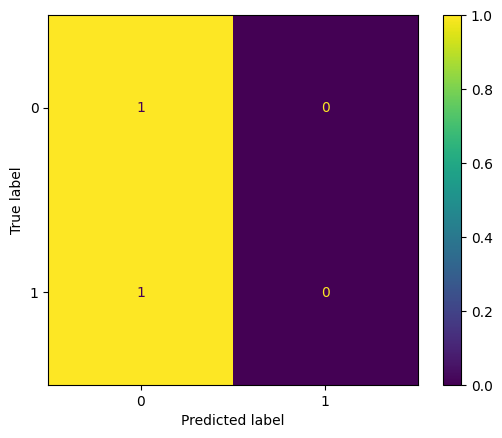

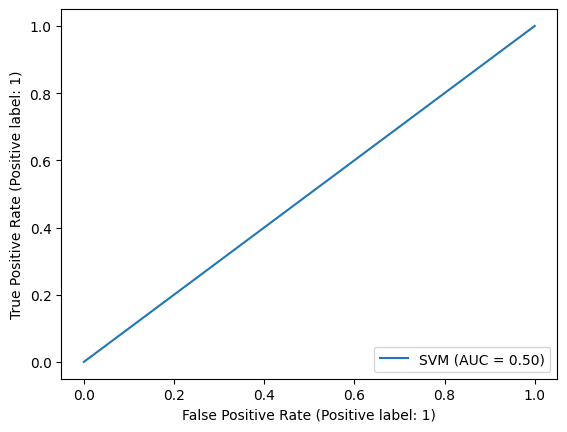

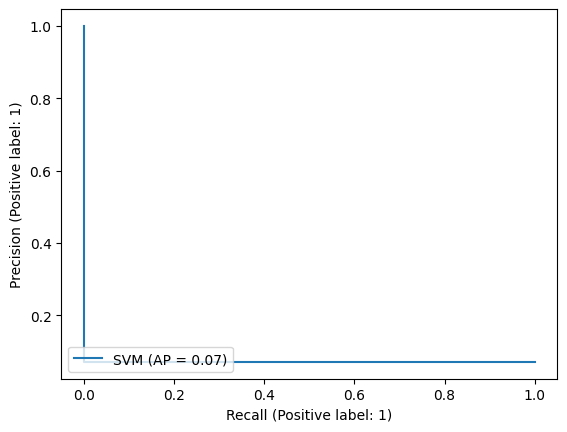

0.928975487115022


C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\linear_model\_ridge.py:2000: RuntimeWarning: divide by zero encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


0.5977372721558768


In [24]:
import sys
from sklearn.linear_model import RidgeClassifierCV
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

classifier_pipe = make_pipeline(StandardScaler(), SVC())
classifier_pipe.fit(X_train, y_train)
y_pred = classifier_pipe.predict(X_test)
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='pred')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.show()

RocCurveDisplay.from_predictions(y_test, y_pred, name='SVM')
plt.show()
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name='SVM')
plt.show()
score = classifier_pipe.score(X_test, y_test)
print(score)

classifier = RidgeClassifierCV(alphas=np.logspace(-3,3,10))
classifier.fit(X_train, y_train)
X_test = X_test.replace(-float('inf'), -sys.float_info.min)
score = classifier.score(X_test, y_test)
print(score)

In [25]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3,3,10))
classifier.fit(X_train, y_train)
X_test = X_test.replace(-float('inf'), -sys.float_info.min)
score = classifier.score(X_test, y_test)
print(score)

C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\linear_model\_ridge.py:2000: RuntimeWarning: divide by zero encountered in divide
  squared_errors = (c / G_inverse_diag) ** 2


0.5977372721558768


# first sampling

In [26]:
#depression tweets
dt = pd.read_csv("data/depression_tweets.tsv", sep="\t", index_col="tweet_id", parse_dates=[2])
#dt["created_at"] = pd.to_datetime(dt["created_at"])
n_depression = len(dt['user_id'].unique())
print(n_depression)

#sample tweets
st = pd.read_csv("data/sample_tweets.tsv", sep="\t", index_col="tweet_id", parse_dates=[2])
#st["created_at"] = pd.to_datetime(st["created_at"])

#df with columns user 0-n with timestamps as row values for each user column
#depression tweets
dt = pd.read_csv("data/depression_tweets.tsv", sep="\t", index_col="tweet_id")
dt["created_at"] = pd.to_datetime(dt["created_at"])

#sample tweets
st = pd.read_csv("data/sample_tweets.tsv", sep="\t", index_col="tweet_id")
st["created_at"] = pd.to_datetime(st["created_at"])

samples = pd.read_csv('sampled_ids')

data = {}
labels = []
for user in dt.user_id.unique():
    tmp = dt[dt['user_id'] == user]
    tweet_list = tmp['created_at'].map(lambda datetime: int(round(datetime.timestamp()))).to_numpy()
    data.update({'' + user + '': tweet_list})
    labels.append(1)

for user in samples['user id'].unique():
    tmp = st[st['user_id'] == user]
    tweet_list = tmp['created_at'].map(lambda datetime: int(round(datetime.timestamp()))).to_numpy()
    data.update({'' + user + '': tweet_list})
    labels.append(0)

df_data = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in data.items()]))
df_labels = pd.DataFrame(labels)
#----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_data = df_data.transpose()
df_data.index = range(0, len(df_data.index))
df_data.sort_index()
df_data = df_data.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2)


603


C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


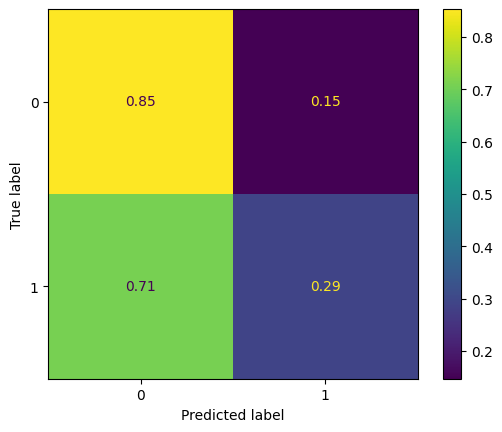

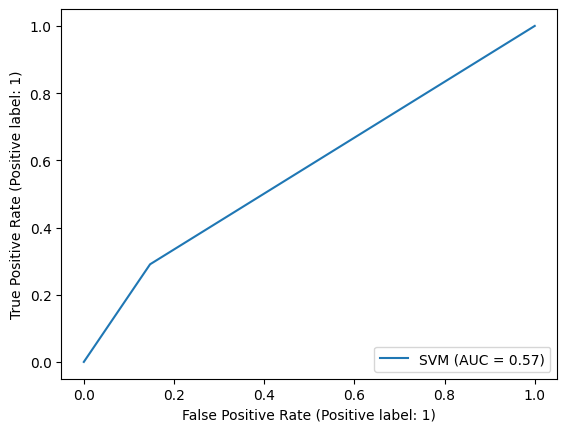

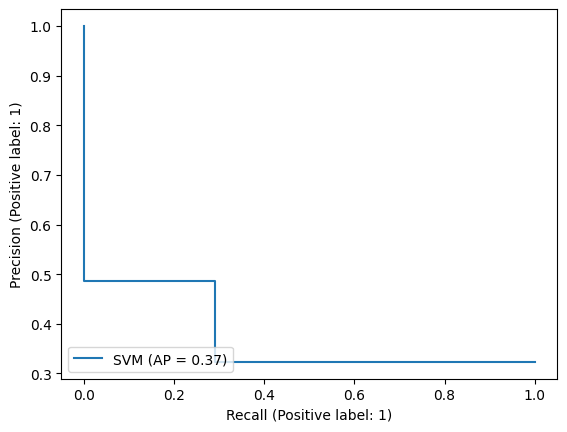

0.6712707182320442


C:\Users\99mor\PycharmProjects\phaseUnlocking\venv\lib\site-packages\sklearn\linear_model\_ridge.py:1182: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.40331491712707185


In [27]:
import sys
from sklearn.linear_model import RidgeClassifierCV
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

classifier_pipe = make_pipeline(StandardScaler(), SVC())
classifier_pipe.fit(X_train, y_train)
y_pred = classifier_pipe.predict(X_test)
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='pred')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.show()

RocCurveDisplay.from_predictions(y_test, y_pred, name='SVM')
plt.show()
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name='SVM')
plt.show()
score = classifier_pipe.score(X_test, y_test)
print(score)

classifier = RidgeClassifierCV(alphas=np.logspace(-3,3,10))
classifier.fit(X_train, y_train)
X_test = X_test.replace(-float('inf'), -sys.float_info.min)
score = classifier.score(X_test, y_test)
print(score)